## 문제 1. 아이템 기반 협업 필터링 실습

### 문제 1-1 (10점)

최근접이웃 협업 필터링에는 두 가지( 사용자 기반 : user-based cf & 아이템 기반 : item-based cf )가 있습니다. 
- 아이템 기반 협업 필터링과 사용자 기반 협업 필터링의 차이를 서술하세요.
-  아이템 기반 협업 필터링을 사용자 기반 협업 필터링보다 널리 사용하게 된 이유를 간략히 서술하세요. 

- 아이템기반은 아이템 간의 유사성, 사용자기반은 사용자 간의 유사성을 사용
- 아이템 기반 협업 필터링이 사용자 기반 협업 필터링보다 더 정확도가 높음, 비슷한 사용자라도 취향이 다를 수 있어서

### 문제 1-2 (40점)

In [15]:
# ================================ 실행 ============================================
import gzip
import pandas as pd
import json

def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Digital_Music_5.json.gz')


# df는 아마존 'digital music' 카테고리의 평점을 모은 데이터프레임입니다. 

print(df.reviewerID.nunique()) # reviewerID : 리뷰자 아이디
print(df.asin.nunique()) # asin : 상품 아이디 
df.overall.describe() # overall : 상품 평점

# ==================================================================================

16566
11797


count    169781.000000
mean          4.700019
std           0.713420
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [16]:
# step 0 : reviewerID - asin 피벗테이블을 만드세요. NaN은 0으로 다 채워줍니다. (10점)
pi = df.pivot_table(index='reviewerID', columns='asin', values='overall', fill_value=0)

In [17]:
# step 1 : 아이템 간 코사인 유사도를 산출합니다. (10점)
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(pi.T)
item_similarity_df = pd.DataFrame(item_similarity, index=pi.columns, columns=pi.columns)

In [18]:
item_similarity_df

asin,3426958910,5557505946,5557706259,5559166928,7799420340,9434682614,9714721180,9721717150,B000002TTH,B000006045,...,B01HF1Z8JO,B01HFCKRA8,B01HGB5USC,B01HGB68GK,B01HGOZSHM,B01HHQSCDQ,B01HIY8QVU,B01HJ91HEC,B01HJ91LIY,B01HJ91MTW
asin,,,,,,,,,,,,,,,,,,,,,
3426958910,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.00000
5557505946,0.0,1.000000,0.119183,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.095730,0.00000,0.00000
5557706259,0.0,0.119183,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.091275,0.00000,0.00000
5559166928,0.0,0.000000,0.000000,1.000000,0.042511,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.087208,0.00000,0.00000
7799420340,0.0,0.000000,0.000000,0.042511,1.000000,0.0,0.045114,0.0,0.0,0.049661,...,0.0,0.0,0.051040,0.01352,0.0,0.0,0.0,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B01HHQSCDQ,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,1.0,0.0,0.000000,0.00000,0.00000
B01HIY8QVU,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,1.0,0.000000,0.00000,0.00000
B01HJ91HEC,0.0,0.095730,0.091275,0.087208,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,1.000000,0.00000,0.00000


In [28]:
# Step 2 : 각 사용자의 아이템별 예측 평점을 구해봅니다. (10점)

def predict_rating(ratings_arr, item_sim_arr):
    ratings_pred = ratings_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

# pivot_table에서 사용자의 아이템 평점 행렬을 추출
user_ratings = pi.T

# 예측 평점 계산
predicted_ratings = predict_ratings(pi.values, item_similarity_df.values)

In [27]:
predicted_ratings

,0,1,2,3,4,5,6,7,8,9,...,11787,11788,11789,11790,11791,11792,11793,11794,11795,11796
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0072041HVZ3465DXUOR,0.0,0.0,0.0,0.026251,0.019046,0.02449,0.006135,0.002021,0.0,0.014006,...,0.000000,0.01288,0.009025,0.018874,0.021118,0.0,0.016486,0.041397,0.0,0.041825
A0081575F2F9XQSSIYA3,0.0,0.0,0.0,0.000000,0.005156,0.00000,0.000000,0.000000,0.0,0.000000,...,0.052235,0.00000,0.000000,0.008143,0.000000,0.0,0.000000,0.000000,0.0,0.000000
A0638585LHS5R1XDIOGY,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
A1006TXWG76H0N,0.0,0.0,0.0,0.000000,0.009660,0.00000,0.002054,0.000000,0.0,0.004658,...,0.000000,0.00000,0.000000,0.011783,0.000000,0.0,0.000000,0.006574,0.0,0.000000
A100UXMXYOQU1X,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZXWUZ9PPSOTL,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
AZY0M1ANDSEPL,0.0,0.0,0.0,0.000000,0.004617,0.00000,0.005095,0.000000,0.0,0.000000,...,0.000000,0.00000,0.000000,0.010418,0.000000,0.0,0.000000,0.000000,0.0,0.000000
AZYOVGJLQ03ML,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.042973,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [29]:
# Step 3 : 사용자가 평점을 부여한 아이템에 대해서만 실제 평점과 예측 평점 사이의 mean squared error 값을 계산해봅니다. (10점)

from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(predicted_ratings, pi.values))

아이템 기반 모든 인접 이웃 MSE:  16.62722639309881


## 문제 2. 잠재요인 협업 필터링 실습 (50점)

위의 데이터를 이용해서 행렬분해를 이용한 잠재 요인 협업 필터링을 구현합니다. (확률적 경사 하강법 이용)

In [54]:
# 위 데이터 이용, 잠재요인 갯수 50개, 경사하강법으로 분해 행렬 업데이트 횟수는 200번, learning rate는 0.01, L2 정규화 계수는 0.01로 설정합니다. 

In [ ]:
import numpy as np

# Example usage
# Replace 'pi.values' with your actual user-item rating matrix
pi_values = pi.values

def matrix_factorization(R, K=50, steps=200, learning_rate=0.01, r_lambda=0.01):
    num_users, num_items = R.shape
    P = np.random.rand(num_users, K)
    Q = np.random.rand(num_items, K)

    for step in range(steps):
        for i in range(num_users):
            for j in range(num_items):
                if R[i, j] > 0:
                    eij = R[i, j] - np.dot(P[i, :], Q[j, :].T)
                    for k in range(K):
                        P[i, k] += learning_rate * (2 * eij * Q[j, k] - r_lambda * P[i, k])
                        Q[j, k] += learning_rate * (2 * eij * P[i, k] - r_lambda * Q[j, k])

        # Calculate error
        error = 0
        for i in range(num_users):
            for j in range(num_items):
                if R[i, j] > 0:
                    error += (R[i, j] - np.dot(P[i, :], Q[j, :].T))**2
                    for k in range(K):
                        error += (r_lambda / 2) * (P[i, k]**2 + Q[j, k]**2)

        if error < 0.001:
            break

    return P, Q

P, Q = matrix_factorization(pi_values, K=50, steps=200, learning_rate=0.01, r_lambda=0.01)
pred_matrix = np.dot(P, Q.T)

In [ ]:
pred_matrix

## 문제 3. 협업 필터링 기반 추천 시스템 구현 (100점)

## 라이브러리 import


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [18, 8]

## 데이터셋 로드 및 전처리

In [40]:
reviews = pd.read_csv('ratings.dat', names=['userId', 'movieId', 'rating', 'time'], delimiter='::', engine='python')
movies = pd.read_csv('movies.dat', names=['movieId', 'movie_names', 'genres'], delimiter='::', engine='python', encoding_errors='ignore')
users = pd.read_csv('users.dat', names=['userId', 'gender', 'age', 'occupation', 'zip'], delimiter='::', engine='python')

print('Reviews shape:', reviews.shape)
print('Users shape:', users.shape)
print('Movies shape:', movies.shape)

Reviews shape: (1000209, 4)
Users shape: (6040, 5)
Movies shape: (3883, 3)


In [41]:
reviews.drop(['time'], axis=1, inplace=True)
users.drop(['zip'], axis=1, inplace=True)

In [42]:
movies['release_year'] = movies['movie_names'].str.extract(r'(?:\((\d{4})\))?\s*$', expand=False)

In [43]:
movies.head()

,movieId,movie_names,genres,release_year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [44]:
ages_map = {1: 'Under 18',
            18: '18 - 24',
            25: '25 - 34',
            35: '35 - 44',
            45: '45 - 49',
            50: '50 - 55',
            56: '56+'}

occupations_map = {0: 'Not specified',
                   1: 'Academic / Educator',
                   2: 'Artist',
                   3: 'Clerical / Admin',
                   4: 'College / Grad Student',
                   5: 'Customer Service',
                   6: 'Doctor / Health Care',
                   7: 'Executive / Managerial',
                   8: 'Farmer',
                   9: 'Homemaker',
                   10: 'K-12 student',
                   11: 'Lawyer',
                   12: 'Programmer',
                   13: 'Retired',
                   14: 'Sales / Marketing',
                   15: 'Scientist',
                   16: 'Self-Employed',
                   17: 'Technician / Engineer',
                   18: 'Tradesman / Craftsman',
                   19: 'Unemployed',
                   20: 'Writer'}

gender_map = {'M': 'Male', 'F': 'Female'}

users['age'] = users['age'].map(ages_map)
users['occupation'] = users['occupation'].map(occupations_map)
users['gender'] = users['gender'].map(gender_map)

## 문제 3-1. 데이터셋 merge


reviews 데이터프레임에 movieId를 기준으로 movies 데이터프레임을, userId를 기준으로 users 데이터프레임을 병합하고, final_df 라는 이름의 데이터프레임으로 저장하세요. (10점)

(final_df.shape 출력 결과 (1000209, 9)이 나오면 정상)

In [47]:
final_df = pd.merge(reviews, movies, on = 'movieId', how = 'left').merge(users, on = 'userId', how = 'left')

In [49]:
final_df.shape

(1000209, 9)

In [ ]:
# 데이터셋 머지

final_df shape: (1000209, 9)


In [50]:
final_df.head()

,userId,movieId,rating,movie_names,genres,release_year,gender,age,occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Female,Under 18,K-12 student
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,1996,Female,Under 18,K-12 student
2,1,914,3,My Fair Lady (1964),Musical|Romance,1964,Female,Under 18,K-12 student
3,1,3408,4,Erin Brockovich (2000),Drama,2000,Female,Under 18,K-12 student
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,1998,Female,Under 18,K-12 student


## 문제 3-2. 시각화

유저의 나이를 '18 미만', '18 - 24', '25 - 34', '35 - 44', '45 - 49', '50 - 55', '56 이상' 으로 나누고, 각 연령대별 유저의 수를 시각화하세요. (10점)


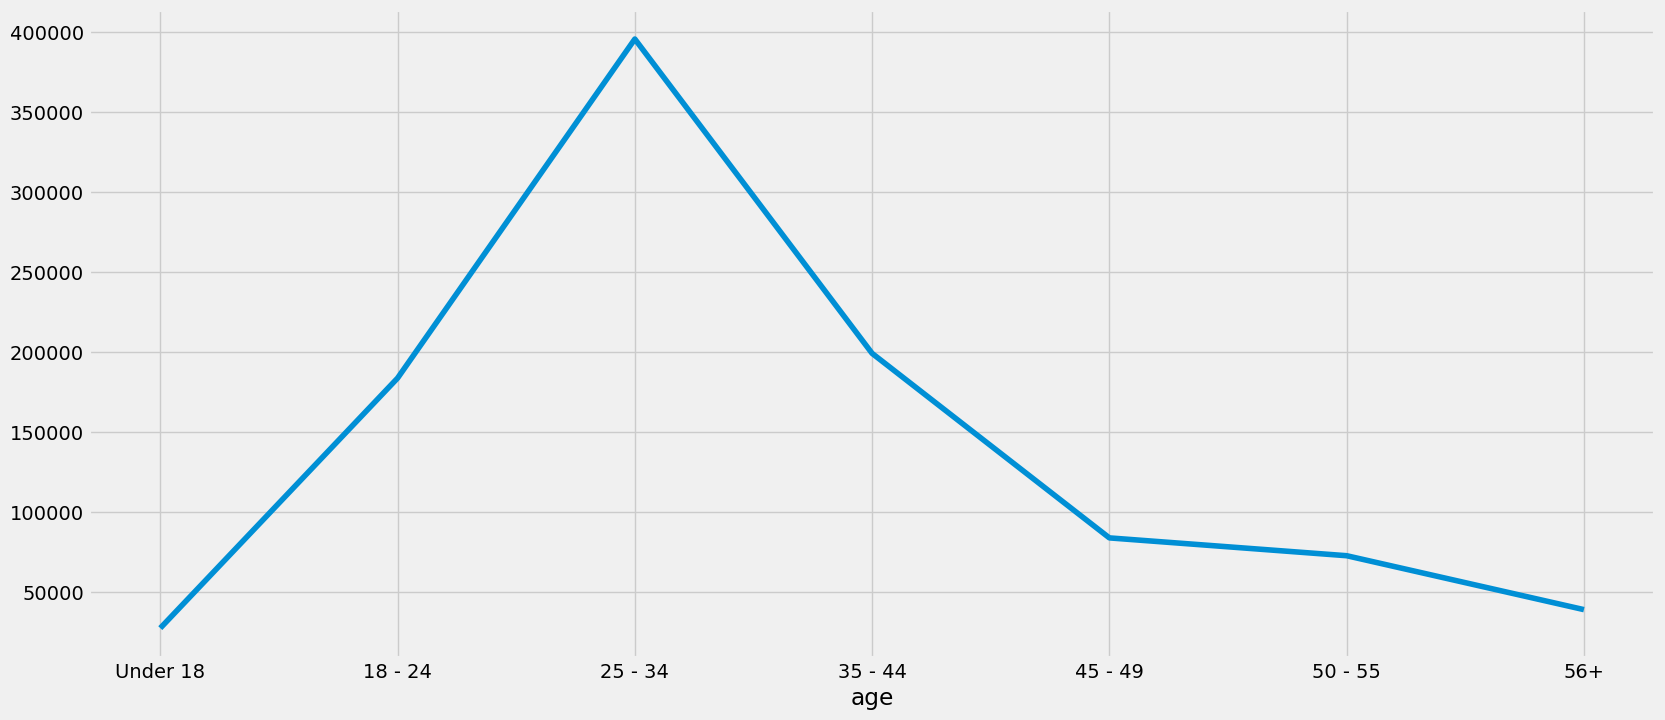

In [63]:
# 시각화 코드
final_df.groupby('age').size().reindex(['Under 18','18 - 24','25 - 34','35 - 44','45 - 49','50 - 55','56+']).plot()
plt.show()

## 문제 3-3. SVD 계산 및 추천

In [64]:
n_users = final_df['userId'].nunique()
n_movies = final_df['movieId'].nunique()

print('Number of users:', n_users)
print('Number of movies:', n_movies)

Number of users: 6040
Number of movies: 3706


In [65]:
final_df_matrix = final_df.pivot(index='userId',
                                 columns='movieId',
                                 values='rating').fillna(0)

In [66]:
final_df_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
user_ratings_mean = np.mean(final_df_matrix.values, axis=1)
ratings_demeaned = final_df_matrix.values - user_ratings_mean.reshape(-1, 1)

In [68]:
# 데이터 sparsity 출력
sparsity = round(1.0 - final_df.shape[0] / float(n_users * n_movies), 3)
print('The sparsity level of MovieLens1M dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of MovieLens1M dataset is 95.5%


In [69]:
from scipy.sparse.linalg import svds

U, sigma, Vt = svds(ratings_demeaned, k=50)  # Number of singular values and vectors to compute

In [70]:
sigma = np.diag(sigma)

In [71]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [72]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = final_df_matrix.columns)

preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244


In [73]:
def recommend_movies(predictions, userID, movies, reviews, num_recommendations):

    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False)

    # Get the user's data and merge in the movie information.
    user_data = reviews[reviews.userId == (userID)]
    user_full = (user_data.merge(movies, how = 'left', on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))

    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full.head(10), recommendations.sort_values('release_year', ascending=False)  # then sort by newest release year

In [74]:
user_already_rated, for_recommend = recommend_movies(preds, 1920, movies, reviews, 10)

User 1920 has already rated 601 movies.
Recommending highest 10 predicted ratings movies not already rated.


## 문제 3-4. 1920이라는 Id를 가진 유저가 이미 평점을 준 영화 10개를 출력하세요. (40점)

In [112]:
user_id = 1920
user_ratings = final_df.loc[final_df['userId'] == user_id]

# user_ratings 데이터프레임을 활용하여 1920이라는 Id를 가진 유저가 이미 평점을 준 영화 10개를 출력
user_ratings.sort_values(by = 'rating', ascending = False, inplace = True)
user_ratings_top_10 = user_ratings.head(10)

In [113]:
user_ratings_top_10[['userId', 'movieId', 'rating', 'movie_names', 'genres', 'release_year']]

,userId,movieId,rating,movie_names,genres,release_year
323834,1920,802,5,Phenomenon (1996),Drama|Romance,1996
323883,1920,2194,5,"Untouchables, The (1987)",Action|Crime|Drama,1987
323575,1920,592,5,Batman (1989),Action|Adventure|Crime|Drama,1989
324092,1920,1210,5,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,1983
324014,1920,3704,5,Mad Max Beyond Thunderdome (1985),Action|Sci-Fi,1985
324084,1920,2944,5,"Dirty Dozen, The (1967)",Action|War,1967
323797,1920,3688,5,Porky's (1981),Comedy,1981
323583,1920,1270,5,Back to the Future (1985),Comedy|Sci-Fi,1985
323584,1920,1271,5,Fried Green Tomatoes (1991),Drama,1991
323975,1920,182,5,Moonlight and Valentino (1995),Drama|Romance,1995


In [ ]:
#

,userId,movieId,rating,movie_names,genres,release_year
292,1920,802,5,Phenomenon (1996),Drama|Romance,1996
341,1920,2194,5,"Untouchables, The (1987)",Action|Crime|Drama,1987
33,1920,592,5,Batman (1989),Action|Adventure|Crime|Drama,1989
550,1920,1210,5,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,1983
472,1920,3704,5,Mad Max Beyond Thunderdome (1985),Action|Sci-Fi,1985
542,1920,2944,5,"Dirty Dozen, The (1967)",Action|War,1967
255,1920,3688,5,Porky's (1981),Comedy,1981
41,1920,1270,5,Back to the Future (1985),Comedy|Sci-Fi,1985
42,1920,1271,5,Fried Green Tomatoes (1991),Drama,1991
433,1920,182,5,Moonlight and Valentino (1995),Drama|Romance,1995


## 문제 3-5. 1920이라는 Id를 가진 유저가 좋아할만한 영화 10개를 출력하세요. (40점)

In [161]:
user_id = 1920
user_rated_movies = final_df.loc[final_df['userId'] == user_id]['movieId']

unrated_movies = list(set(final_df['movieId']) - set(user_rated_movies))
user_top_movies = preds.loc[user_id, unrated_movies].sort_values(ascending=False).head(10)

result = movies[movies['movieId'].isin(user_top_movies.index)]

In [162]:
# 왜 다를까요...?
result

,movieId,movie_names,genres,release_year
313,316,Stargate (1994),Action|Adventure|Sci-Fi,1994
1242,1262,"Great Escape, The (1963)",Adventure|War,1963
1255,1275,Highlander (1986),Action|Adventure,1986
1271,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure,1989
1283,1303,"Man Who Would Be King, The (1975)",Adventure,1975
1351,1372,Star Trek VI: The Undiscovered Country (1991),Action|Adventure|Sci-Fi,1991
1898,1967,Labyrinth (1986),Adventure|Children's|Fantasy,1986
1936,2005,"Goonies, The (1985)",Adventure|Children's|Fantasy,1985
2297,2366,King Kong (1933),Action|Adventure|Horror,1933
3106,3175,Galaxy Quest (1999),Adventure|Comedy|Sci-Fi,1999


In [ ]:
#

,movieId,movie_names,genres,release_year
1117,1372,Star Trek VI: The Undiscovered Country (1991),Action|Adventure|Sci-Fi,1991
1052,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure,1989
1585,1962,Driving Miss Daisy (1989),Drama,1989
1119,1378,Young Guns (1988),Action|Comedy|Western,1988
1043,1275,Highlander (1986),Action|Adventure,1986
1036,1263,"Deer Hunter, The (1978)",Drama|War,1978
2823,3421,Animal House (1978),Comedy,1978
1035,1262,"Great Escape, The (1963)",Adventure|War,1963
2412,2949,Dr. No (1962),Action,1962
1681,2096,Sleeping Beauty (1959),Animation|Children's|Musical,1959
